In [30]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt


In [31]:
#function to make single euler step
def euler_step(f, xn, tn, delta_t):
    '''f is the right hand side of first order ODE x_dot = f 
       xn is the inital x value
       t is the timestep
       tn is initial t value'''
    print(xn)
    xn = xn + f(xn, tn)*delta_t  #euler step
    return xn  #returning new x value

In [32]:
#function to do euler steps from t0 to tf
def solve_to(xn, tn, tf, delta_tmax,f, method):
    x = []
    t = []
    #euler or rk4
    if method in ('euler', 'Euler', 'e', 'E'):
        step_function = euler_step
    elif method in ('rk', 'RK', 'r', 'Runge-Kutta 4', 'RK4', 'runge-kutta4', 'rk4'):
        step_function = RK4_step
    
    #looping until x(tf) found
    while tn + delta_tmax < tf: 
        xn = step_function(f, xn, tn, delta_tmax)
        tn += delta_tmax
        x.append(xn)
        t.append(tn)
        print(xn)
    else:         
        diff = 1 - tn
        newdelta_tmax = diff
        tn += diff
        xn = step_function(f, xn, tf, newdelta_tmax)
        x.append(xn)
        t.append(tn)
        print(xn)
        return x, t
    

In [33]:
#creating function to solve ode using Euler's or RK-4
def solve_ode(f, x0, t0, tf, delta_t, method):
    estimation = solve_to(x0,t0,tf,delta_t,f, method)
    return(estimation)

In [34]:
#step function for Runge-Kuta 4th order
def RK4_step(f, xn, tn, delta_t): 
    k1 = delta_t*f(xn, tn) 
    k2 = delta_t*f(xn + 0.5 * k1 , tn + 0.5 * delta_t) 
    k3 = delta_t*f(xn + 0.5 * k2 , tn + 0.5 * delta_t) 
    k4 = delta_t*f(xn + k3, tn + delta_t) 
   
    xn = xn + (1.0/6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
    return (xn)

In [35]:
#creatinf main() function that can read user inputs in from command line and call solve_ode
def main():
    if __name__ == "__main__":
        #f =  float(input('What is your dx/dt?'))
        x0 = float(input('What is your initial x value?'))
        t0 = float(input('What is your initial t value?'))
        tf = float(input('What is your final t value?'))
        delta_t = float(input('What is your timestep?'))
        method = str(input('Would you like to use Euler method or Runge-Kutta 4?'))
        solve_ode(lambda x,t: x, x0, t0, tf, delta_t, method)

In [36]:
#function to create timestep error plot of ode method
def error_delta_t(deltat_values):
    errors_euler = [] 
    errors_rk4 = []
    #looping through delta_t values
    for delta_t in deltat_values: 
        (xe, te) = solve_ode(lambda x,t: x, 1, 0, 1, delta_t, 'euler')
        error_euler = (np.exp(te[-1]) - xe[-1])/np.exp(te[-1]) * 100   #
        errors_euler.append(error_euler)  #appending error array with every error
    for delta_t in deltat_values: 
        (x_rk4, t_rk4) = solve_ode(lambda x,t: x, 1, 0, 1, delta_t, 'rk4')
        error_rk4 = (np.exp(t_rk4[-1]) - x_rk4[-1])/np.exp(t_rk4[-1]) * 100   #
        errors_rk4.append(error_rk4)  #appending error array with every error
    return errors_euler, errors_rk4
    

In [37]:
def solve2nd_ode():
    """Generate numerical solution for x'' = -x

    Returns (t, x, v) ready for plotting.
    """
    #
    # The ODE and ICs give the initial value problem (IVP)
    #
    #   x'' = -x,  x(0) = 0, x'(0) = 1
    #
    # which has the unique solution
    #
    #   x = sin(t)
    #
    # To solve numerically we convert ODE to first order form as
    #
    #   x' = v
    #   v' = -x
    #
    # with the initial conditions
    #
    #   x(0) = 0
    #   v(0) = 1
    #
    # Now treating this as a vector ODE we have X = (x, v) and
    #
    #    (x, v)' = (v, -x)
    #
    # We need to make a function f that can compute the rhs from the vector
    # (x, v):
    #
    #   X' = f(X, t)

    def f_shm(X, t):
        x, v = X
        dxdt = v
        dvdt = -x
        dXdt = [dxdt, dvdt]
        return dXdt

    #
    # Initial conditions as a vector
    #
    x0 = 0
    v0 = 1
    X0 = [x0, v0]

    # Solve from t=0 to t=10 and get 200 equally spaced points in the output
    t = np.linspace(0, 10, 200)

    # Actually compute the solution: 
    X_solution = solve_ode(f_shm, X0, 0, 1, 0.3, 'e')

    # X_solution is a matrix with 200 rows and 2 columns. The first column is
    # x and the other is v.
    x_solution = X_solution[:, 0]
    v_solution = X_solution[:, 1]

    return t, x_solution, v_solution


def plot_solution(t, x, v):
    """Produce a figure with timeseries and phasespace plots"""

    # Create a figure with two plotting axes side by side:
    fig = plt.figure(figsize=(6, 3))
    ax1 = fig.add_axes([0.58, 0.15, 0.35, 0.7])
    ax2 = fig.add_axes([0.08, 0.15, 0.35, 0.7])

    # Timeseries plot
    ax1.set_title('Time series: $x, v$ against $t$')
    ax1.plot(t, x, color='green', linewidth=2, label=r'$x$')
    ax1.plot(t, v, color='blue', linewidth=2, label=r'$v$')
    ax1.set_yticks([-1, 0, 1])
    ax1.set_xlabel(r'$t$')
    ax1.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
    ax1.set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$'])
    ax1.grid()
    ax1.legend()

    # Phasespace plot
    ax2.set_title('Phase space: $v$ against $x$')
    ax2.plot(x, v, linewidth=2, color='red')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$v$', rotation=0)
    ax2.set_xticks([-1, 0, 1])
    ax2.set_yticks([-1, 0, 1])
    ax2.grid()

    # Return the figure handle for showing/saving
    return fig


In [38]:
(x, t) = solve_ode(lambda x, t: x, 1, 0, 1, 0.3, 'euler')
(x2, t2) = solve_ode(lambda x, t: x, 1, 0, 1, 0.3, 'rk4')

1
1.3
1.3
1.69
1.69
2.197
2.197
2.4167
1.3498375
1.82206127640625
2.4594866381910214
2.7181528975017697


In [39]:
x2

[1.3498375, 1.82206127640625, 2.4594866381910214, 2.7181528975017697]

In [40]:
t

[0.3, 0.6, 0.8999999999999999, 1.0]

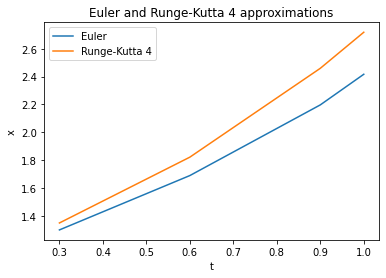

In [41]:
#plotting approximations
plt.plot(t,x, label = 'Euler')
plt.plot(t2,x2, label = 'Runge-Kutta 4')
plt.ylabel('x')
plt.xlabel('t')
plt.title('Euler and Runge-Kutta 4 approximations')
plt.legend(loc = 'best')
plt.show()

In [42]:
t = np.arange(0.001, 1, 0.001)
(Euler_error, RK4_error) = error_delta_t(t)

1
1.001
1.001
1.002001
1.002001
1.003003001
1.003003001
1.004006004001
1.004006004001
1.005010010005001
1.005010010005001
1.006015020015006
1.006015020015006
1.007021035035021
1.007021035035021
1.008028056070056
1.008028056070056
1.009036084126126
1.009036084126126
1.0100451202102523
1.0100451202102523
1.0110551653304625
1.0110551653304625
1.0120662204957929
1.0120662204957929
1.0130782867162886
1.0130782867162886
1.014091365003005
1.014091365003005
1.015105456368008
1.015105456368008
1.016120561824376
1.016120561824376
1.0171366823862005
1.0171366823862005
1.0181538190685866
1.0181538190685866
1.0191719728876552
1.0191719728876552
1.0201911448605427
1.0201911448605427
1.0212113360054034
1.0212113360054034
1.0222325473414087
1.0222325473414087
1.0232547798887501
1.0232547798887501
1.0242780346686389
1.0242780346686389
1.0253023127033074
1.0253023127033074
1.0263276150160108
1.0263276150160108
1.0273539426310268
1.0273539426310268
1.0283812965736578
1.0283812965736578
1.0294096778702315

1.1206245365041094
1.1206245365041094
1.1228657855771176
1.1228657855771176
1.1251115171482717
1.1251115171482717
1.1273617401825682
1.1273617401825682
1.1296164636629333
1.1296164636629333
1.1318756965902592
1.1318756965902592
1.1341394479834397
1.1341394479834397
1.1364077268794066
1.1364077268794066
1.1386805423331654
1.1386805423331654
1.1409579034178317
1.1409579034178317
1.1432398192246673
1.1432398192246673
1.1455262988631167
1.1455262988631167
1.147817351460843
1.147817351460843
1.1501129861637647
1.1501129861637647
1.1524132121360922
1.1524132121360922
1.1547180385603644
1.1547180385603644
1.1570274746374851
1.1570274746374851
1.1593415295867602
1.1593415295867602
1.1616602126459337
1.1616602126459337
1.1639835330712256
1.1639835330712256
1.166311500137368
1.166311500137368
1.1686441231376428
1.1686441231376428
1.170981411383918
1.170981411383918
1.173323374206686
1.173323374206686
1.1756700209550994
1.1756700209550994
1.1780213609970096
1.1780213609970096
1.1803774037190036
1

1.0993985842654035
1.1048955771867306
1.1048955771867306
1.1104200550726642
1.1104200550726642
1.1159721553480275
1.1159721553480275
1.1215520161247676
1.1215520161247676
1.1271597762053915
1.1271597762053915
1.1327955750864185
1.1327955750864185
1.1384595529618506
1.1384595529618506
1.14415185072666
1.14415185072666
1.1498726099802932
1.1498726099802932
1.1556219730301946
1.1556219730301946
1.1614000828953457
1.1614000828953457
1.1672070833098225
1.1672070833098225
1.1730431187263717
1.1730431187263717
1.1789083343200035
1.1789083343200035
1.1848028759916036
1.1848028759916036
1.1907268903715615
1.1907268903715615
1.1966805248234194
1.1966805248234194
1.2026639274475364
1.2026639274475364
1.208677247084774
1.208677247084774
1.2147206333201979
1.2147206333201979
1.2207942364867987
1.2207942364867987
1.2268982076692327
1.2268982076692327
1.2330326987075788
1.2330326987075788
1.2391978622011166
1.2391978622011166
1.2453938515121221
1.2453938515121221
1.2516208207696828
1.2516208207696828

1.6357048687707754
1.6618761466711078
1.6618761466711078
1.6884661650178456
1.6884661650178456
1.7154816236581312
1.7154816236581312
1.7429293296366613
1.7429293296366613
1.7708161989108477
1.7708161989108477
1.7991492580934214
1.7991492580934214
1.8279356462229162
1.8279356462229162
1.8571826165624827
1.8571826165624827
1.8868975384274824
1.8868975384274824
1.9170878990423221
1.9170878990423221
1.9477613054269993
1.9477613054269993
1.9789254863138313
1.9789254863138313
2.0105882940948527
2.0105882940948527
2.04275770680037
2.04275770680037
2.075441830109176
2.075441830109176
2.108648899390923
2.108648899390923
2.1423872817811778
2.1423872817811778
2.1766654782896766
2.1766654782896766
2.2114921259423115
2.2114921259423115
2.2468759999573886
2.2468759999573886
2.2828260159567066
2.2828260159567066
2.319351232212014
2.319351232212014
2.356460851927406
2.356460851927406
2.3941642255582445
2.3941642255582445
2.4324708531671764
2.4324708531671764
2.471390386817851
2.471390386817851
2.51093

1.3788428067618905
1.3788428067618905
1.4546791611337946
1.4546791611337946
1.5346865149961533
1.5346865149961533
1.6190942733209417
1.6190942733209417
1.7081444583535934
1.7081444583535934
1.802092403563041
1.802092403563041
1.9012074857590082
1.9012074857590082
2.0057738974757537
2.0057738974757537
2.11609146183692
2.11609146183692
2.232476492237951
2.232476492237951
2.355262699311038
2.355262699311038
2.4848021477731455
2.4848021477731455
2.6214662659006684
2.6214662659006684
2.647680928559674
1
1.056
1.056
1.1151360000000001
1.1151360000000001
1.1775836160000002
1.1775836160000002
1.243528298496
1.243528298496
1.313165883211776
1.313165883211776
1.3867031726716355
1.3867031726716355
1.464358550341247
1.464358550341247
1.546362629160357
1.546362629160357
1.632958936393337
1.632958936393337
1.724404636831364
1.724404636831364
1.8209712964939202
1.8209712964939202
1.9229456890975798
1.9229456890975798
2.0306306476870444
2.0306306476870444
2.1443459639575186
2.1443459639575186
2.264429

1.9387777599999998
1.9387777599999998
2.2877577567999996
2.2877577567999996
2.5165335324799996
1
1.181
1.181
1.3947610000000001
1.3947610000000001
1.6472127410000001
1.6472127410000001
1.9453582471210003
1.9453582471210003
2.297468089849901
2.297468089849901
2.5157275583856418
1
1.182
1.182
1.3971239999999998
1.3971239999999998
1.6514005679999997
1.6514005679999997
1.9519554713759997
1.9519554713759997
2.3072113671664316
2.3072113671664316
2.514860390211411
1
1.183
1.183
1.399489
1.399489
1.655595487
1.655595487
1.958569461121
1.958569461121
2.316987672506143
2.316987672506143
2.5139316246691648
1
1.184
1.184
1.401856
1.401856
1.659797504
1.659797504
1.965200244736
1.965200244736
2.3267970897674237
2.3267970897674237
2.5129408569488176
1
1.185
1.185
1.404225
1.404225
1.664006625
1.664006625
1.9718478506250001
1.9718478506250001
2.336639702990625
2.336639702990625
2.511887680714922
1
1.186
1.186
1.406596
1.406596
1.6682228559999999
1.6682228559999999
1.9785123072159998
1.978512307215999

1.524
2.249424
1
1.525
1.525
2.2493749999999997
1
1.526
1.526
2.249324
1
1.5270000000000001
1.5270000000000001
2.2492710000000002
1
1.528
1.528
2.249216
1
1.529
1.529
2.2491589999999997
1
1.53
1.53
2.2491
1
1.5310000000000001
1.5310000000000001
2.2490390000000002
1
1.532
1.532
2.248976
1
1.533
1.533
2.2489109999999997
1
1.534
1.534
2.248844
1
1.5350000000000001
1.5350000000000001
2.248775
1
1.536
1.536
2.248704
1
1.537
1.537
2.2486309999999996
1
1.538
1.538
2.2485559999999998
1
1.5390000000000001
1.5390000000000001
2.248479
1
1.54
1.54
2.2484
1
1.541
1.541
2.248319
1
1.542
1.542
2.248236
1
1.5430000000000001
1.5430000000000001
2.248151
1
1.544
1.544
2.248064
1
1.545
1.545
2.247975
1
1.546
1.546
2.247884
1
1.5470000000000002
1.5470000000000002
2.2477910000000003
1
1.548
1.548
2.247696
1
1.549
1.549
2.2475989999999997
1
1.55
1.55
2.2475
1
1.5510000000000002
1.5510000000000002
2.247399
1
1.552
1.552
2.247296
1
1.553
1.553
2.247191
1
1.554
1.554
2.247084
1
1.5550000000000002
1.555000000000

1.8202975923459004
1.8221188003905013
1.8239418305540545
1.8257666846595901
1.8275933645319626
1.829421871997852
1.8312522088857657
1.833084377026041
1.834918378250846
1.8367542143941822
1.8385918872918858
1.8404313987816299
1.8422727507029262
1.8441159448971267
1.8459609832074257
1.8478078674788618
1.8496565995583194
1.8515071812945307
1.8533596145380775
1.8552139011413933
1.8570700429587648
1.858928041846334
1.8607878996621001
1.862649618265921
1.8645131995195152
1.8663786452864644
1.8682459574322143
1.8701151378240775
1.8719861883312343
1.8738591108247353
1.8757339071775034
1.877610579264335
1.8794891289619022
1.881369558148755
1.8832518687053228
1.8851360625139162
1.8870221414587292
1.888910107425841
1.8907999623032177
1.8926917079807142
1.8945853463500764
1.8964808793049428
1.8983783087408466
1.9002776365552172
1.9021788646473827
1.9040819949185714
1.9059870292719139
1.9078939696124444
1.9098028178471034
1.9117135758847394
1.9136262456361106
1.915540829013887
1.917457327932652
1.9

2.489296150022345
2.519347652213458
2.549761944819819
2.5805434075521183
2.6116964729941783
2.6432256272412538
2.6751354105460377
2.7074304179724646
2.7182818279958334
1.0130848673567083
1.0263409484671593
1.0397704836406103
1.0533757425004682
1.067159024367861
1.0811226586502287
1.095269005234999
1.1096004548884129
1.124119429659571
1.138828383289765
1.1537298016271662
1.1688262030469392
1.1841201388768534
1.1996141938284641
1.2153109864339342
1.2312131694885726
1.2473234304991632
1.263644492138159
1.280179112703822
1.29693008658638
1.313900244740287
1.3310924551626602
1.3485096233779788
1.3661546929291244
1.3840306458748466
1.4021405032937384
1.4204873257948052
1.4390742140347155
1.457904309241819
1.4769807937470216
1.4963068915216071
1.515885868722096
1.5357210342422332
1.5558157402721997
1.5761733828651405
1.5967974025111051
1.6176912847184994
1.638858560603144
1.660302807485042
1.6820276494929542
1.7040367581768854
1.7263338531285852
1.748922702610168
1.7718071241909579
1.79499098

1.5311188113794156
1.764731033673358
2.033986910789846
2.344324814559914
2.702012882682319
2.7182736936286735
1.153729291233375
1.3310912774498658
1.5357189960991613
1.7718039889031156
2.0441821603216583
2.3584328349798165
2.7182734506236588
1.154883579904
1.3337560831318789
1.5403330000060813
1.7789052892912913
2.0544285088068874
2.3726257509077344
2.718273421924585
1.1560390229427084
1.336426222566332
1.5449608645705968
1.7860350483629146
2.0647262122508967
2.3869040730547257
2.7182733518302484
1.157195621494
1.339101706404885
1.5496026313868767
1.7931933800964746
2.075075527939666
2.4012683152011323
2.71827324435834
1.158353376703375
1.3417825453201109
1.5542583421731997
1.8003803989257154
2.085476714446172
2.4157189942149833
2.7182731031979115
1.1595122897173333
1.3444687500055332
1.5589280387723168
1.8075962197414408
2.095930031636794
2.430256630070502
2.7182729317194005
1.160672361683375
1.3471603311756633
1.5636117631518147
1.8148409578933227
2.106435740677761
2.4448817458667262

2.7150039847977565
2.161475146677333
2.7149856792057854
2.163622857243375
2.7149672918535552
2.165772639574
2.7149488225885348
2.1679244954427084
2.7149302712577397
2.170078426624
2.7149116377077327
2.172234434893375
2.7148929217846267
2.1743925220273335
2.7148741233340834
2.176552689803375
2.7148552422013177
2.17871494
2.714836278231097
2.180879274396708
2.714817231267742
2.183045694774
2.7147981011551305
2.1852142029133748
2.7147788877366956
2.187384800597333
2.7147595908554307
2.189557489609375
2.7147402103538862
2.1917322717339998
2.7147207460741747
2.1939091487567084
2.714701197857972
2.1960881224640003
2.7146815655465146
2.198269194643375
2.714661848980606
2.2004523670833334
2.714642048000615
2.202637641573375
2.714622162446479
2.204825019904
2.7146021921577033
2.2070145038667084
2.7145821369733643
2.209206095254
2.7145619967321086
2.211399795859375
2.7145417712721587
2.2135956074773335
2.7145214604313086
2.2157935319033752
2.71450106404693
2.217993570934
2.7144805819559705
2.220

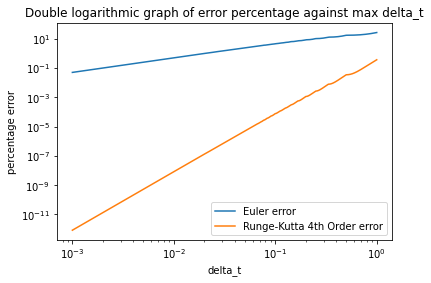

In [43]:
#plotting the double log graph of error against delta_t
plt.loglog(t, Euler_error, label = 'Euler error')
plt.loglog(t, RK4_error, label = 'Runge-Kutta 4th Order error')
plt.xlabel('delta_t')
plt.ylabel('percentage error')
plt.title('Double logarithmic graph of error percentage against max delta_t')
plt.legend(loc = 'best')
plt.show()



In [46]:
def solve2nd_ode(): 
    
    def dXdt(X,t):
        x,y = X
        dx = y
        dy = -x
        dX = [dx, dy]
        return np.array(dX)

    x0 = 0
    y0 = 1
    X0 = [x0, y0]

    # Actually compute the solution: 
    X_solution = solve_ode(dXdt, X0, 0, 1, 0.3, 'e')

    # X_solution is a matrix with 200 rows and 2 columns. The first column is
    # x and the other is v.

    return X_solution

In [47]:
solve2nd_ode()

[0, 1]
[0.3 1. ]
[0.3 1. ]
[0.6  0.91]
[0.6  0.91]
[0.873 0.73 ]
[0.873 0.73 ]
[0.946  0.6427]


([array([0.3, 1. ]),
  array([0.6 , 0.91]),
  array([0.873, 0.73 ]),
  array([0.946 , 0.6427])],
 [0.3, 0.6, 0.8999999999999999, 1.0])

In [23]:
def solve_ode(f, x0, t0, tf, delta_t, method):

SyntaxError: unexpected EOF while parsing (<ipython-input-23-1ca55f2a5e43>, line 1)